In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#using existing data set and creating gif for seeing difference between two images
dir_A = '/content/gdrive/MyDrive/extracted/frameA/10K/'
dir_B = '/content/gdrive/MyDrive/extracted/frameC/10K/'
dir_amplified = '/content/gdrive/MyDrive/extracted/amplified/10K/'

In [ ]:
import cv2
import os
import imageio
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    i=0
    filename = os.listdir(folder)
    filename = sorted(filename)
    for img_name in filename:
        if i<1 :
            img = imageio.imread(os.path.join(folder,img_name))
            if img is not None:
                images.append(img)
                i=i+1
        else:
           break
    return images[0]

In [ ]:
images = []
def createGif(folder1, folder2, gif_name): #folder1, folder2):
    images_from_folder1 = load_images_from_folder(folder1)
    images_from_folder2 = load_images_from_folder(folder2)
    images.append(images_from_folder1)
    images.append(images_from_folder2)
    imageio.mimsave(os.path.join("/content/gdrive/MyDrive/ProjectCode/",gif_name), images,'GIF',duration=0.5)

In [ ]:
#create gif from FrameA and Frame B images
createGif(dir_A,dir_B,"frame_A_B.gif")

In [ ]:
#create gif from FrameA and Apmplified images
createGif(dir_A,dir_amplified,"frame_A_Amplified.gif")

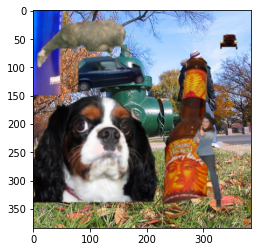

In [ ]:
plt.imshow(images[0])

In [ ]:
#Createing own synthetic data set and create gif
# Importing Image module from PIL package
from PIL import Image
 
# creating a image object (main image)
frameA_backgroundImage = Image.open(r"/content/gdrive/MyDrive/ProjectCode/background_img.jpg")
 
# creating a image object (image which is to be paste on main image)
frameA_foregroundImage = Image.open(r"/content/gdrive/MyDrive/ProjectCode/1_lock.png")

frameB_backgroundImage = frameA_backgroundImage.copy()
frameB_foregroundImage = frameA_foregroundImage.copy() 
randomAmplified_backgroundImage = frameA_backgroundImage.copy()
randomAmplified_foregroundImage = frameA_foregroundImage.copy() 


In [ ]:
frameA_backgroundImage = frameA_backgroundImage.resize((500,500))

In [ ]:
frameA_foregroundImage = frameA_foregroundImage.resize((100,100))

In [ ]:
#pasting image and save frameA image
frameA_backgroundImage.paste(frameA_foregroundImage,(100,100))
frameA_backgroundImage.save("/content/gdrive/MyDrive/ProjectCode/frameA_img.jpg",quality=96)

In [ ]:
#pasting image and save frameB image
frameB_backgroundImage = frameB_backgroundImage.resize((500,500))
frameB_foregroundImage = frameB_foregroundImage.resize((100,100))
#here using static aplification factor 80 and applied on every pixel
frameB_backgroundImage.paste(frameB_foregroundImage,(180,180))
frameB_backgroundImage.save("/content/gdrive/MyDrive/ProjectCode/frameB_img.jpg",quality=96)

In [ ]:
#Creating gif using Image list
def CreategifFromImages(pathOfImage1,pathOfImage2,gif_name):
    images_frameAB = []
    images_frameAB.append(imageio.imread(pathOfImage1))
    images_frameAB.append(imageio.imread(pathOfImage2))
    imageio.mimsave(os.path.join("/content/gdrive/MyDrive/ProjectCode/",gif_name), images_frameAB,'GIF',duration=0.5)

In [ ]:
frameA_Image = "/content/gdrive/MyDrive/ProjectCode/frameA_img.jpg"
frameB_Image= "/content/gdrive/MyDrive/ProjectCode/frameB_img.jpg"
CreategifFromImages(frameA_Image,frameB_Image,"syntheticData_frame_A_B.gif")

In [ ]:
#randomly generate aplification factor by using radint
import random 
n = random. randint(0,80) 
#pasting image and save frameB image
randomAmplified_backgroundImage = randomAmplified_backgroundImage.resize((500,500))
randomAmplified_foregroundImage = randomAmplified_foregroundImage.resize((100,100))
#here using static aplification factor 80 and applied on every pixel
randomAmplified_backgroundImage.paste(randomAmplified_foregroundImage,(100+n,100+n))
randomAmplified_backgroundImage.save("/content/gdrive/MyDrive/ProjectCode/frameAmplified_img.jpg",quality=96)

In [ ]:
#frameA_Image = "/content/gdrive/MyDrive/ProjectCode/frameA_img.jpg"
frameAmplification_dir = "/content/gdrive/MyDrive/ProjectCode/frameAmplified_img.jpg"
CreategifFromImages(frameA_Image,frameAmplification_dir,"syntheticData_frame_A_amplified.gif")

In [2]:
#Considering 5 real world scenario for creating synthetic data set  that was considered with existing dataset
import cv2
import os
import imageio
import matplotlib.pyplot as plt
def showImage(path,imageName):
    img = imageio.imread(os.path.join(path,imageName))
    plt.imshow(img)


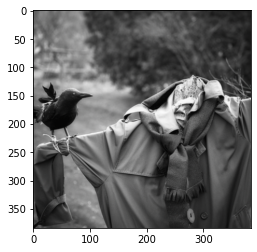

In [3]:
#Case1: Static foreground and static Blur background image
path = '/content/gdrive/MyDrive/extracted/frameA/30K/'
showImage(path,"020001.png")

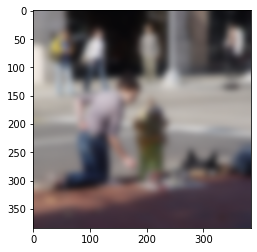

In [11]:
#Case2 : Blur background and foreground image with motion
path = '/content/gdrive/MyDrive/extracted/frameA/80K/'
showImage(path,"070014.png")

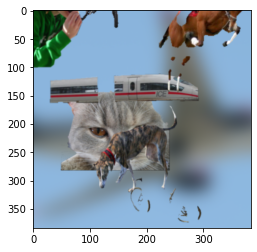

In [5]:
#Case3 : Blur background and Both background and foreground image are moving
path = '/content/gdrive/MyDrive/extracted/frameA/50K/'
showImage(path,"040005.png")

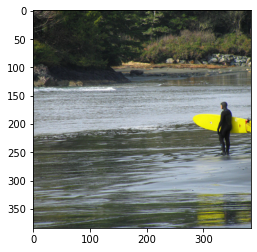

In [12]:
#Case4 : Background clear and changing intensity but no motion 
path = '/content/gdrive/MyDrive/extracted/frameA/80K/'
showImage(path,"077001.png")

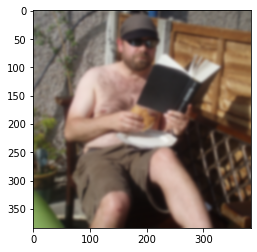

In [10]:
#Case5 : Blur background and foreground with no motion but change intensity
path = '/content/gdrive/MyDrive/extracted/frameA/70K/'
showImage(path,"060001.png")
